In [ ]:
# Start writing code here...
# Start writing code here...
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import bernoulli

In [ ]:
N = 10  # number of nodes
k = 1.5  # average connections per node: degree of network
p = 0.15  # k/N
adj_matrix = bernoulli.rvs(p, size=(N, N))  # adjacency matrix
np.fill_diagonal(adj_matrix, 0)
adj_matrix

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 1, 0, 0]])

<AxesSubplot:>

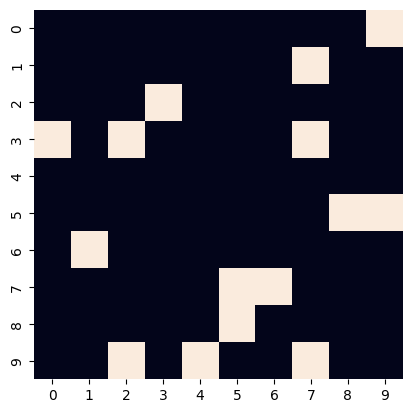

In [ ]:
sns.heatmap(adj_matrix, cbar=False, square=True)

In [ ]:
# adjacency list
adj_list = {node_i: np.where(row)[0] for node_i,row in enumerate(adj_matrix)}
adj_list

{0: array([9]),
 1: array([7]),
 2: array([3]),
 3: array([0, 2, 7]),
 4: array([], dtype=int64),
 5: array([8, 9]),
 6: array([1]),
 7: array([5, 6]),
 8: array([5]),
 9: array([2, 4, 7])}

In [ ]:
# edge list
edge_list = [(ni, vi) for ni, row in enumerate(adj_matrix) for vi, ri in enumerate(row) if ri]
edge_list

[(0, 9),
 (1, 7),
 (2, 3),
 (3, 0),
 (3, 2),
 (3, 7),
 (5, 8),
 (5, 9),
 (6, 1),
 (7, 5),
 (7, 6),
 (8, 5),
 (9, 2),
 (9, 4),
 (9, 7)]

(-0.9664177118836128,
 0.1942214198545593,
 -1.0128976675403674,
 1.0648630977949707)

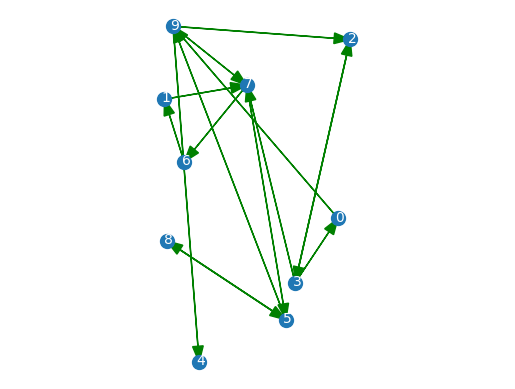

In [ ]:
def draw_arc(a, b, hw = 0.06):
    # Connects points a and b with an arrow: a-->b
    plt.arrow(a[0], a[1], b[0] - a[0], b[1] - a[1], 
              head_width = hw, length_includes_head = True, color="green"
              )


a, b = -1, 1
x = np.random.random(N)*(b-a) + a
y = np.random.random(N)*(b-a) + a

plt.plot(x, y, '.', ms=20)

offset = 0.015
for ni in range(N):
    plt.text(x[ni]-offset, y[ni]-offset, str(ni), color='w')

for ei in range(len(edge_list)):
    a = x[edge_list[ei][0]], y[edge_list[ei][0]]  # origin
    b = x[edge_list[ei][1]], y[edge_list[ei][1]]  # targent
    draw_arc(a, b)

plt.axis('off')
plt.axis('equal')

![](http://mathinsight.org/media/image/image/polar_coordinates_cartesian.png)

(-1.1003323636703608,
 1.1005139993023623,
 -1.0484183422195337,
 1.0776981762244244)

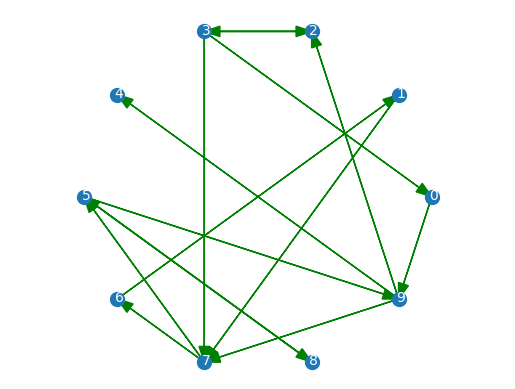

In [ ]:
angle = np.linspace(0, 2*np.pi, N, endpoint=False)
x = np.cos(angle)
y = np.sin(angle)


plt.plot(x, y, '.', ms=20)

offset = 0.015
for ni in range(N):
    plt.text(x[ni]-offset, y[ni]-offset, str(ni), color='w')

for ei in range(len(edge_list)):
    a = x[edge_list[ei][0]], y[edge_list[ei][0]]  # origin
    b = x[edge_list[ei][1]], y[edge_list[ei][1]]  # targent
    draw_arc(a, b)

plt.axis('off')
plt.axis('equal')

(-1.1005230810839624,
 1.1005230810839624,
 -1.046712167924669,
 1.046712167924669)

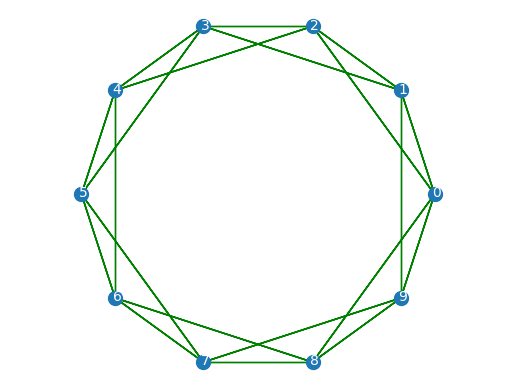

In [ ]:
C = []  # Connectivity matrix
N = 10
k = 4
for ni in range(N):
    C += [[]]
    for ki in range(k//2):
        C[ni] += [ni+(ki+1), ni-(ki+1)]

C = np.array(C)
C[np.where(C < 0)] += N
C[np.where(C >= N)] -= N

edge_list = [(ni, vi) for ni, vecinos in enumerate(C) for vi in vecinos]

angle = np.linspace(0, 2*np.pi, N, endpoint=False)
x = np.cos(angle)
y = np.sin(angle)


plt.plot(x, y, '.', ms=20)

offset = 0.015
for ni in range(N):
    plt.text(x[ni]-offset, y[ni]-offset, str(ni), color='w')

for ei in range(len(edge_list)):
    a = x[edge_list[ei][0]], y[edge_list[ei][0]]  # origin
    b = x[edge_list[ei][1]], y[edge_list[ei][1]]  # targent
    draw_arc(a, b, 0)

plt.axis('off')
plt.axis('equal')

In [ ]:
C

array([[1, 9, 1, 9],
       [2, 0, 2, 0],
       [3, 1, 3, 1],
       [4, 2, 4, 2],
       [5, 3, 5, 3],
       [6, 4, 6, 4],
       [7, 5, 7, 5],
       [8, 6, 8, 6],
       [9, 7, 9, 7],
       [0, 8, 0, 8]])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cce3455d-da08-4c10-a6fe-39f2a30c6a51' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>